## Libraries

For creating this chart, we will need to load the following libraries:

- [pandas](https://python-graph-gallery.com) for data manipulation
- [matplotlib](https://python-graph-gallery.com) for styling the chart
- [seaborn](https://python-graph-gallery.com) for creating the chart
- `numpy` for creating the data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

Since our goal is to create a simple density chart, we only need one numerical variable:

In [4]:
x = np.random.normal(10, 3, 1000)
df = pd.DataFrame({'x': x})

## Default plot

Let's start by creating a figure with a simple [density plot](https://python-graph-gallery.com/density-plot/)

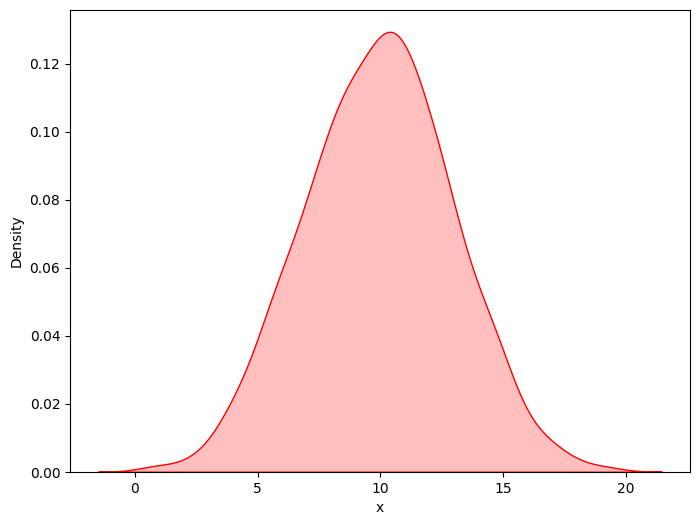

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(df['x'], color='red', ax=ax, shade=True)

plt.show()

## Add median line

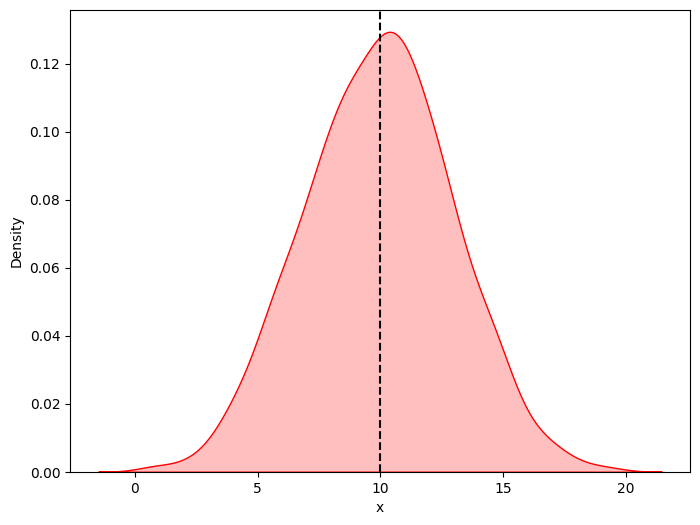

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['x'], color='red', ax=ax, shade=True)

# add vertical line at median
median = df['x'].median()
ax.axvline(median, color='black', linestyle='--')

plt.show()

## Add quantiles

It can be interesting to **add quantiles to a distribution chart** in order to have a better understanding of the data distribution.

First we have to compute the quantiles using the `np.percentile()` function from `numpy`. Then we can add them to the chart using the `axvline()` function.

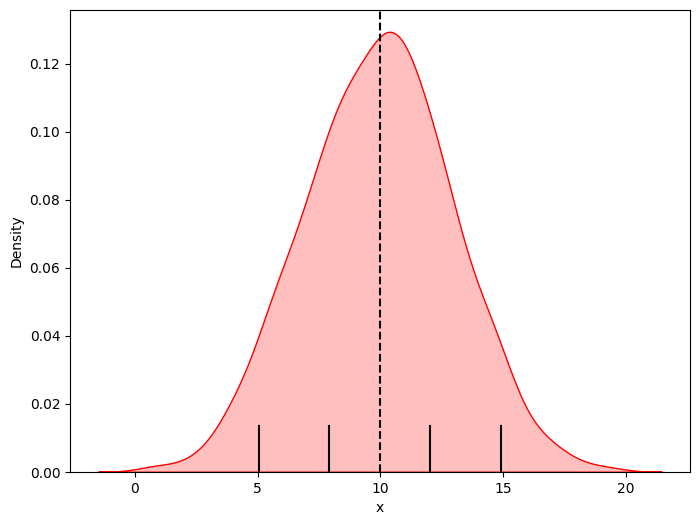

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['x'], color='red', ax=ax, shade=True)

# add vertical line at median
median = df['x'].median()
plt.axvline(median, color='black', linestyle='--')

# compute quantiles
quantiles_to_compute = [5, 25, 75, 95]
quantiles = np.percentile(
    df['x'],
    quantiles_to_compute
)
quantiles = quantiles.tolist()

# add small vertical lines at the quartiles
for quantile in quantiles:
    ax.axvline(
        quantile, # position on the x-axis
        color='black', # color of the line
        ymax=0.1 # 10% of the plot height
    )

plt.show()

## Fill between quantiles

It is also possible to **fill the area between quantiles** in order to highlight a specific area of the distribution.

This can be done using the `fill_between()` function from `matplotlib` that needs the following arguments:

- the **x values** (quantiles)
- the **y values** (height of the rectangle)
- the **color** of the rectangle

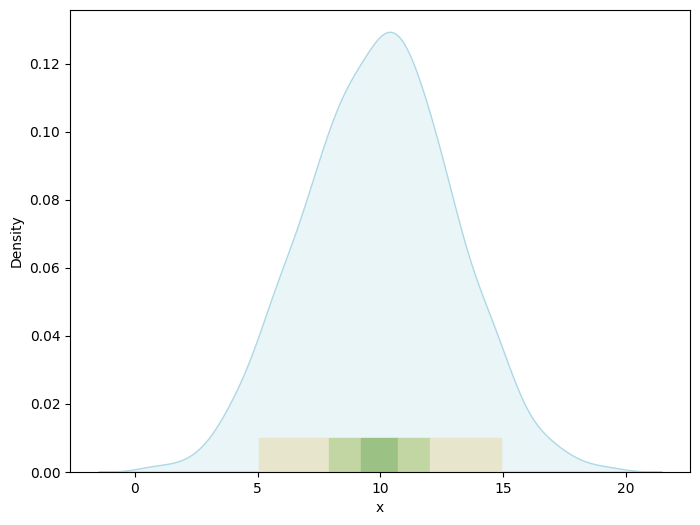

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['x'], color='lightblue', ax=ax, shade=True)

# compute quantiles
quantiles_to_compute = [5, 25, 40, 60, 75, 95]
quantiles = np.percentile(
    df['x'],
    quantiles_to_compute
)
quantiles = quantiles.tolist()

darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lightgreen = '#E7E5CB'
colors = [lightgreen, midgreen, darkgreen, midgreen, lightgreen]
for i in range(len(quantiles) - 1):
        ax.fill_between(
            [quantiles[i], # lower bound
             quantiles[i+1]], # upper bound
            0, # start from 0 on the y-axis
            0.01, # height of the colored area
            color=colors[i]
        )

plt.show()

## Annotations

When adding quantiles to a distribution chart, it's **not necessary obvious** to know what they represent. It can be useful to add **annotations** to the chart in order to **explicitly show** the value of each quantile.

For this, we use the `text()` function from `matplotlib` that needs the following arguments:

- the **x position** of the annotation
- the **y position** of the annotation
- the **text** to display
- the **horizontal alignment** of the text
- the **font size** of the text

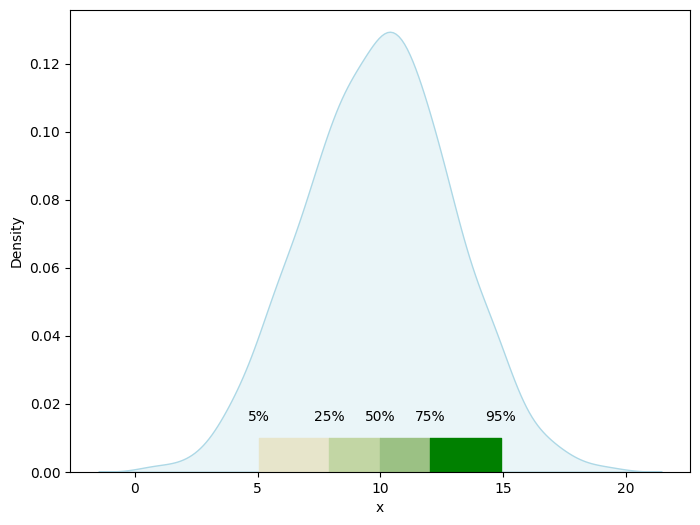

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(df['x'], color='lightblue', ax=ax, shade=True)

# compute quantiles
quantiles_to_compute = [5, 25, 50, 75, 95]
quantiles = np.percentile(
    df['x'],
    quantiles_to_compute
)
quantiles = quantiles.tolist()

# plot regions between quantiles
darkgreen = '#9BC184'
midgreen = '#C2D6A4'
lightgreen = '#E7E5CB'
colors = [lightgreen, midgreen, darkgreen, 'green']
for i in range(len(quantiles) - 1):
        ax.fill_between(
            [quantiles[i], # lower bound
             quantiles[i+1]], # upper bound
            0, # start from 0 on the y-axis
            0.01, # height of the colored area
            color=colors[i]
        )

# annotate the quantiles
for i, quantile in enumerate(quantiles):
    ax.text(
        quantile, # x-coordinate
        0.015, # y-coordinate
        f'{quantiles_to_compute[i]}%', # text
        horizontalalignment='center', # centered
        fontsize=10, # small font size
    )

plt.show()

## Going further

This article explains how to create a **density chart** with quantiles using the `seaborn` library. 

You might be interested in [how to customize annotations](http://python-graph-gallery.com/how-to-custom-annotations-matplotlib/) and [how to highlight as specific point](http://python-graph-gallery.com/193-annotate-matplotlib-chart/)